# Projet 4: Analysez les ventes de votre entreprise (2)

In [1]:
# Import des librairies
import numpy as np
print(f"numpy version {np.__version__}")
import pandas as pd
print(f"pandas version {pd.__version__}")
import seaborn as sns
print(f"seaborn version {sns.__version__}")

import matplotlib.pyplot as plt

import datetime as dt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy.stats import pearsonr

numpy version 1.14.3
pandas version 1.0.3
seaborn version 0.8.1


# Mission 2 : Analyse des données

In [2]:
# Chargement des tables : 
# Table complète
cpv = pd.read_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/cpv.csv')
# df sans les clients grands comptes
cpv_ss_gc = pd.read_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/cpv_new.csv')
# df sans les grands comptes et les 18 ans
cpv_ss_ab = pd.read_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/cpv_ss_ab.csv')

## Indicateurs de tendance centrale et de dispersion

Moyenne, médiane, mode...

In [3]:
# On trouve des indicateurs avec describe
cpv.describe(include='all')

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
count,336838,336816,336816,336837,336838.000000,336838.000000,336837,336837.000000,336837.000000,336837
unique,3287,336816,169194,8621,NaN,NaN,2,NaN,NaN,3
top,1_369,2021-06-05 02:42:29.197160,s_118668,c_1609,NaN,NaN,m,NaN,NaN,30-50
freq,1081,1,14,12855,NaN,NaN,169251,NaN,NaN,204382
mean,NaN,NaN,NaN,NaN,17.214426,0.430020,NaN,1977.823805,44.176195,NaN
std,NaN,NaN,NaN,NaN,17.858593,0.591048,NaN,13.524468,13.524468,NaN
min,NaN,NaN,NaN,NaN,0.620000,0.000000,NaN,1929.000000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,8.610000,0.000000,NaN,1971.000000,35.000000,NaN
50%,NaN,NaN,NaN,NaN,13.900000,0.000000,NaN,1980.000000,42.000000,NaN
75%,NaN,NaN,NaN,NaN,18.990000,1.000000,NaN,1987.000000,51.000000,NaN


In [3]:
cpv.date = pd.to_datetime(cpv.date)

In [4]:
cpv_ss_ab.date = pd.to_datetime(cpv_ss_ab.date)

### Exemples d'analyses pour les prix : 

#### Globalement

In [78]:
print('Toutes catégories confondues : ')
print(f"- Moyenne des prix: {cpv['price'].mean():.2f}")
print('- Médiane:', cpv['price'].median())
print('- Mode:', cpv['price'].mode()[0])
print('- Min:', cpv['price'].min())
print('- Max:', cpv['price'].max())
print('- Variance:', cpv['price'].var())
print('- Écart-type:', cpv['price'].std())
print('- Coefficient de variation générale:', cpv['price'].std(ddof=0)/cpv['price'].mean())
print('- Skewness empirique:', cpv['price'].skew()) # régularité (ou non) avec laquelle les observations se répartissent 
# autour de la valeur centrale; γ1>0 alors la distribution est étalée à droite;
print('- Kurtosis empirique:', cpv['price'].kurtosis()) # mesure d'aplatissement; γ2>0 , alors la distribution est moins 
# aplatie que la distribution normale : les observations sont plus concentrées.
print(f'Chiffre d\'affaires (arrondi) : {cpv.price.sum() : .0e}', '€')

Toutes catégories confondues : 
- Moyenne des prix: 17.21
- Médiane: 13.9
- Mode: 15.99
- Min: 0.62
- Max: 300.0
- Variance: 318.92935594812457
- Écart-type: 17.85859333621001
- Coefficient de variation générale: 1.0374186886958934
- Skewness empirique: 5.4805797800337315
- Kurtosis empirique: 45.43645969950359
Chiffre d'affaires (arrondi) :  6e+06 €


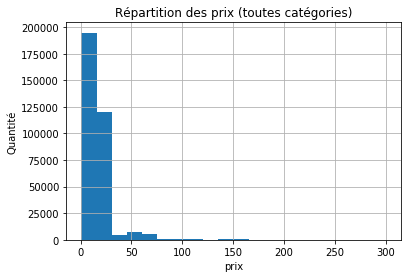

In [3]:
# Je reprends le graphique déjà utilisé de répartition des prix : 
plt.title('Répartition des prix (toutes catégories)')
plt.xlabel('prix')
plt.ylabel('Quantité')
cpv['price'].hist(bins=20)

plt.savefig('fig17.jpeg')

#### Prix par catégorie

##### Catégorie 0

In [5]:
cat0 = cpv[cpv['categ']==0]['price']

print('Catégorie 0 : ')
print(f"- Moyenne des prix: {cat0.mean():.2f}")
print('- Médiane:', cat0.median())
print('- Mode:', cat0.mode()[0])
print('- Min:', cat0.min())
print('- Max:', cat0.max())
print('- Variance:', cat0.var())
print('- Écart-type:', cat0.std())
print('- Coefficient de variation générale:', cat0.std(ddof=0)/cat0.mean())
print('- Skewness empirique:', cat0.skew()) # régularité (ou non) avec laquelle les observations se répartissent 
# autour de la valeur centrale; γ1>0 alors la distribution est étalée à droite;
print('- Kurtosis empirique:', cat0.kurtosis()) # mesure d'aplatissement; γ2>0 , alors la distribution est moins 
# aplatie que la distribution normale : les observations sont plus concentrées.
print(f'Chiffre d\'affaires (arrondi) : {cat0.sum() : .2e}', '€')

Catégorie 0 : 
- Moyenne des prix: 10.65
- Médiane: 9.99
- Mode: 4.99
- Min: 0.62
- Max: 40.99
- Variance: 24.30230205875296
- Écart-type: 4.929736510073633
- Coefficient de variation générale: 0.4630122487328891
- Skewness empirique: 0.4271396950359897
- Kurtosis empirique: -0.3700310009088872
Chiffre d'affaires (arrondi) :  2.23e+06 €


In [6]:
cat1 = cpv[cpv['categ']==1]['price']

print('Catégorie 1 : ')
print(f"- Moyenne des prix: {cat1.mean():.2f}")
print('- Médiane:', cat1.median())
print('- Mode:', cat1.mode()[0])
print('- Min:', cat1.min())
print('- Max:', cat1.max())
print('- Variance:', cat1.var())
print('- Écart-type:', cat1.std())
print('- Coefficient de variation générale:', cat1.std(ddof=0)/cat1.mean()) # Plus la valeur du coefficient de variation 
# est élevée, plus la dispersion autour de la moyenne est grande.
print('- Skewness empirique:', cat1.skew()) # régularité (ou non) avec laquelle les observations se répartissent 
# autour de la valeur centrale; γ1>0 alors la distribution est étalée à droite;
print('- Kurtosis empirique:', cat1.kurtosis()) # mesure d'aplatissement; γ2>0 , alors la distribution est moins 
# aplatie que la distribution normale : les observations sont plus concentrées.
print(f'Chiffre d\'affaires (arrondi) : {cat1.sum() : .2e}', '€')

Catégorie 1 : 
- Moyenne des prix: 20.48
- Médiane: 19.08
- Mode: 15.99
- Min: 2.0
- Max: 80.99
- Variance: 57.29260059571928
- Écart-type: 7.569187578315078
- Coefficient de variation générale: 0.36958061357470795
- Skewness empirique: 1.727168284476662
- Kurtosis empirique: 8.152797423622884
Chiffre d'affaires (arrondi) :  2.25e+06 €


In [7]:
cat2 = cpv[cpv['categ']==2]['price']

print('Catégorie 2 : ')
print(f"- Moyenne des prix: {cat2.mean():.2f}")
print('- Médiane:', cat2.median())
print('- Mode:', cat2.mode()[0])
print('- Min:', cat2.min())
print('- Max:', cat2.max())
print('- Variance:', cat2.var())
print('- Écart-type:', cat2.std())
print('- Coefficient de variation générale:', cat2.std(ddof=0)/cat2.mean())
print('- Skewness empirique:', cat2.skew()) # régularité (ou non) avec laquelle les observations se répartissent 
# autour de la valeur centrale; γ1>0 alors la distribution est étalée à droite;
print('- Kurtosis empirique:', cat2.kurtosis()) # mesure d'aplatissement; γ2>0 , alors la distribution est moins 
# aplatie que la distribution normale : les observations sont plus concentrées.
print(f'Chiffre d\'affaires (arrondi) : {cat2.sum() : .2e}', '€')

Catégorie 2 : 
- Moyenne des prix: 75.19
- Médiane: 62.83
- Mode: 68.99
- Min: 30.99
- Max: 300.0
- Variance: 1528.6318301421995
- Écart-type: 39.09772154668606
- Coefficient de variation générale: 0.519968904497272
- Skewness empirique: 2.3143212706241654
- Kurtosis empirique: 5.528654721731269
Chiffre d'affaires (arrondi) :  1.32e+06 €


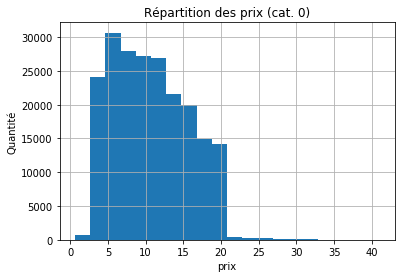

In [8]:
cat0.hist(bins=20)
plt.title(f'Répartition des prix (cat. 0)')
plt.xlabel('prix')
plt.ylabel('Quantité')

plt.savefig('fig18.jpeg')

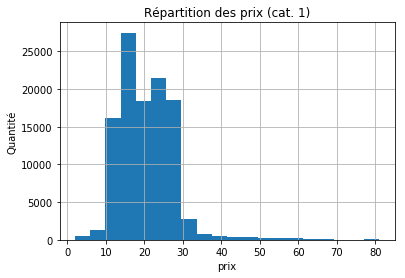

In [9]:
cat1.hist(bins=20)
plt.title('Répartition des prix (cat. 1)')
plt.xlabel('prix')
plt.ylabel('Quantité')

plt.savefig('fig19.jpeg')

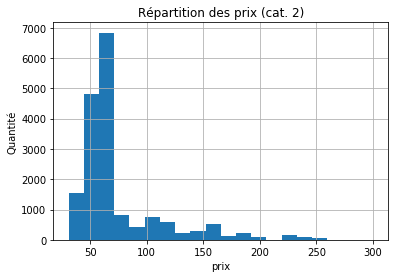

In [10]:
cat2.hist(bins=20)
plt.title('Répartition des prix (cat. 2)')
plt.xlabel('prix')
plt.ylabel('Quantité')

plt.savefig('fig20.jpeg')

### Chiffre d'affaires

In [5]:
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [7]:
cac = cpv.groupby('classe_age').agg({'price': ['mean', 'count', 'sum']}).reset_index()
cac

classe_age      price                      
                   mean   count           sum
0      18-30  41.203531   35979  1.482462e+06
1      30-50  13.423479  204380  2.743491e+06
2        50+  16.294535   96457  1.571722e+06

In [12]:
ppc = cpv.groupby('categ').agg({'price': ['mean', 'count', 'sum']}).reset_index()
ppc

categ      price                      
              mean   count           sum
0   0.0  10.647072  209546  2.231051e+06
1   1.0  20.480385  109737  2.247456e+06
2   2.0  75.190281   17555  1.319965e+06

In [13]:
ppc.columns = ['categ', 'mean', 'quantité', 'ca']

In [21]:
ppc

,categ,mean,quantité,ca
0,0.0,10.647072,209546,2.231051e+06
1,1.0,20.480385,109737,2.247456e+06
2,2.0,75.190281,17555,1.319965e+06


In [88]:
print(f"Sur la période, le CA global est de {cpv.price.sum():} € (environ{cpv.price.sum(): .0e} €).")
print(f'- cat 0 : {cat0.sum() : .2e}', '€')
print(f'- cat 1 : {cat1.sum() : .2e}', '€')
print(f'- cat 2 : {cat2.sum() : .2e}', '€')

Sur la période, le CA global est de 5798472.68841556 € (environ 6e+06 €).
- cat 0 :  2.23e+06 €
- cat 1 :  2.25e+06 €
- cat 2 :  1.32e+06 €


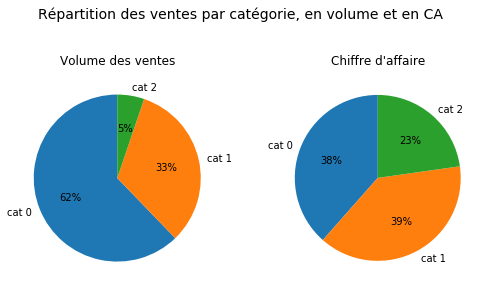

In [24]:
# Visualisation avec des pieplot
fig = plt.figure(figsize=(8, 4))
fig.suptitle("Répartition des ventes par catégorie, en volume et en CA", fontsize=14, y= 1.1)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.pie(ppc.quantité, 
       labels=["cat 0", "cat 1", "cat 2"],
       autopct='%1.0f%%',
       startangle=90
      )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Volume des ventes')

ax2.pie(ppc.ca, 
       labels=["cat 0", "cat 1", "cat 2"], 
       autopct='%1.0f%%', 
       startangle=90
      )
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Chiffre d\'affaire')

plt.subplots_adjust(wspace=0.4,hspace=0)

plt.savefig('fig21.jpeg')

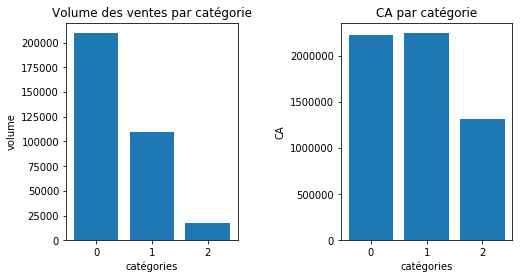

In [25]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(ppc.categ, ppc.quantité)
ax1.set_xlabel('catégories')
ax1.set_ylabel('volume')
ax1.set_title('Volume des ventes par catégorie')

ax2.bar(ppc.categ, ppc.ca)
ax2.set_xlabel('catégories')
ax2.set_ylabel('CA')
ax2.set_title('CA par catégorie')

plt.subplots_adjust(wspace=0.6,hspace=0)

plt.savefig('fig22.jpeg')

##### Si on ne prend pas en compte le mois d'octobre

In [10]:
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [50]:
ppc_ss_oct = cpv[['date','price','categ']].set_index('date')

In [51]:
# Je passe l'index en datetime
ppc_ss_oct.index = pd.to_datetime(ppc_ss_oct.index)

In [53]:
ppc_ss_oct = ppc_ss_oct.to_period(freq='M')

In [55]:
ppc_ss_oct = ppc_ss_oct[ppc_ss_oct.index!='2021-10'].reset_index()

In [70]:
ppc_ss_oct = ppc_ss_oct.groupby('categ').agg({'price': ['mean', 'count', 'sum']}).reset_index()
ppc_ss_oct

categ      price                      
              mean   count           sum
0   0.0  10.649301  190788  2.031759e+06
1   1.0  20.483697  108071  2.213694e+06
2   2.0  75.253777   16395  1.233786e+06

In [71]:
ppc_ss_oct.columns = ['categ', 'mean', 'quantité', 'ca']

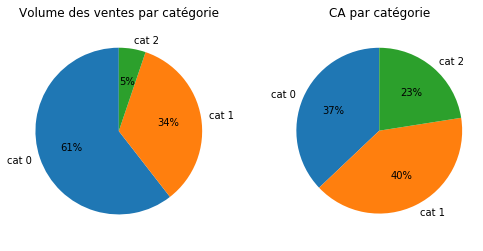

In [72]:
# Visualisation avec des pieplot
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.pie(ppc_ss_oct.quantité, 
       labels=["cat 0", "cat 1", "cat 2"],
       autopct='%1.0f%%',
       startangle=90
      )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Volume des ventes par catégorie')

ax2.pie(ppc_ss_oct.ca, 
       labels=["cat 0", "cat 1", "cat 2"], 
       autopct='%1.0f%%', 
       startangle=90
      )
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('CA par catégorie')

plt.subplots_adjust(wspace=0.4,hspace=0)

# plt.savefig('fig38.jpg')

La différence est négligeable dans le cadre de cette analyse. 

#### CA sur l'année

In [111]:
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [18]:
# Je calcule le nombre de ventes et le CA par produit
prodagg = cpv[['id_prod', 'price']].groupby('id_prod').agg({'price': ['count', 'sum']}).reset_index()
prodagg.columns = ['id_prod', 'nb_ventes', 'ca']
prodagg.head()

,id_prod,nb_ventes,ca
0,0_0,611,2291.25
1,0_1,249,2736.51
2,0_10,12,215.40
3,0_100,2,41.20
4,0_1000,222,1518.48


In [19]:
# Vérification avec le produit 0_100
cpv[cpv.id_prod=='0_100']

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
22259,0_100,2021-09-17 01:55:36.439809,s_91041,c_5894,20.6,0.0,m,1975.0,47.0,30-50
312068,0_100,2021-11-06 20:52:21.946694,s_115753,c_2035,20.6,0.0,f,1976.0,46.0,30-50


#### Courbe de Lorenz pour mieux comprendre le chiffres d'affaires

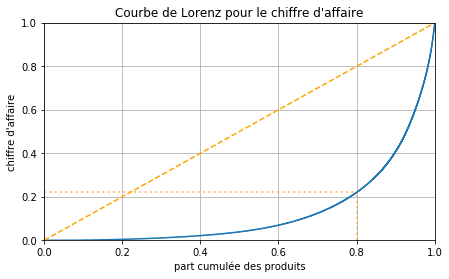

In [22]:
fig = plt.figure(figsize=(7, 4))

# Courbe de Lorenz 
CA = prodagg['ca']

lorenz = np.cumsum(np.sort(CA)) / CA.sum()
lorenz = np.append([0], lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, drawstyle = 'steps-post')
plt.plot([0,1], [0,1], color='orange', linestyle = '--') ## line plot of equality

plt.xlabel('part cumulée des produits')
plt.ylabel('chiffre d\'affaire')

plt.ylim(0, 1)
plt.xlim(0, 1)

plt.grid()

plt.title('Courbe de Lorenz pour le chiffre d\'affaire')

# ligne pointillée
plt.axhline(y = 0.22, xmin = 0, xmax  = 0.8, color = 'darkorange', alpha = 0.5, linestyle = ':', linewidth = 2)
plt.axvline(x = 0.8, ymin = 0, ymax  = 0.22, color = 'darkorange', alpha = 0.5, linestyle = ':', linewidth = 2)

plt.savefig('fig23.jpeg')

# Voir ici pour des explications sur la courbe de Lorenz : http://www.jybaudot.fr/Stats/indicegini.html

80 % du chiffre d'affaires est fait par 20 % des produits (attention à la lecture de la courbe). 

In [161]:
# Gini
auc = lorenz[:-1].sum() / len(lorenz) # auc = area under curve
S = 0.5 - auc
gini = 2 * S
gini

0.7404000037334911

L'indice de Gini est égal à 0.74.  
Rappel : l'inégalité est d'autant plus forte que l'indice de Gini est élevé.  
Une petite partie des produits contribue à une grosse part du CA. 

##### Produits les plus vendus en volume et en CA

In [137]:
# En volume
prodagg.sort_values(by='nb_ventes', ascending=False).head(10)

,id_prod,nb_ventes,ca
2609,1_369,1081,25933.19
2663,1_417,1062,22291.38
2752,1_498,1036,24211.32
2660,1_414,1027,24473.41
2672,1_425,1013,17210.87
2641,1_398,952,9681.84
2651,1_406,946,23470.26
2659,1_413,944,16982.56
2648,1_403,939,16892.61
2652,1_407,933,14918.67


In [145]:
# En CA
prodagg.sort_values(by='ca', ascending=False).head(10)

,id_prod,nb_ventes,ca
3089,2_135,491,33874.09
3064,2_112,473,31960.61
3053,2_102,489,28919.46
3171,2_209,390,27296.10
3062,2_110,434,27016.50
2609,1_369,1081,25933.19
2638,1_395,891,25830.09
3123,2_166,111,25534.44
3225,2_43,361,25266.39
3220,2_39,435,25225.65


## Représentation de séries temporelles

### Répartition des ventes en fonction des heures

In [42]:
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [23]:
# Je copie le df principal 
vh = cpv.copy()

In [24]:
# Je récupère l'heure
# cf. https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
vh['heure'] = vh['date'].dt.hour 

In [46]:
vh.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,heure
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50,18.0
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50,11.0
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50,19.0
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50,20.0
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50,11.0


In [47]:
vh[vh['heure']==18]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age,heure
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50,18.0
17,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,15.99,1.0,f,1977.0,45.0,30-50,18.0
23,1_442,2021-07-30 18:35:07.270657,s_69203,c_4450,24.98,1.0,f,1977.0,45.0,30-50,18.0
47,1_601,2021-05-14 18:24:20.775668,s_34514,c_4450,21.99,1.0,f,1977.0,45.0,30-50,18.0
59,0_2111,2021-05-14 18:58:23.052457,s_34514,c_4450,12.99,0.0,f,1977.0,45.0,30-50,18.0
65,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,3.99,0.0,f,1977.0,45.0,30-50,18.0
90,0_1694,2021-12-06 18:30:04.633500,s_130397,c_4450,7.65,0.0,f,1977.0,45.0,30-50,18.0
113,1_412,2021-05-16 18:21:01.727460,s_35390,c_1576,16.65,1.0,m,1956.0,66.0,50+,18.0
117,1_544,2021-05-16 18:12:08.246606,s_35390,c_1576,29.54,1.0,m,1956.0,66.0,50+,18.0
120,1_396,2021-11-01 18:19:49.653798,s_113318,c_1576,18.60,1.0,m,1956.0,66.0,50+,18.0


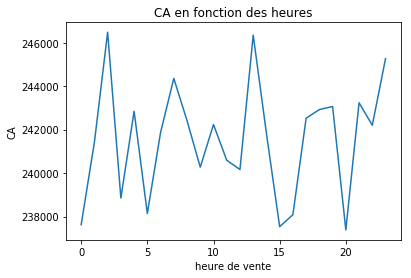

In [25]:
# Je sors le graph en faisant un groupby sur chaque heure et une moyenne sur les prix
vh.groupby('heure')['price'].sum().plot()
plt.title('CA en fonction des heures')
plt.ylabel('CA')
plt.xlabel('heure de vente')

plt.savefig('fig24.jpeg')

### Répartition des ventes par jour

In [48]:
# Je reprends le df de base : 
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [26]:
# Je garde les colonnes utiles du df de base et mets la date en index
vj = cpv[['date','price']].set_index('date')

In [27]:
# Création d'un df pour voir les données par jour
vj = vj.to_period(freq='D')

In [136]:
vj.head(1)

,price
date,
2021-04-10,4.99


In [28]:
# Je fais un group by sur la date et une somme sur les prix
vj = vj.groupby('date').sum()

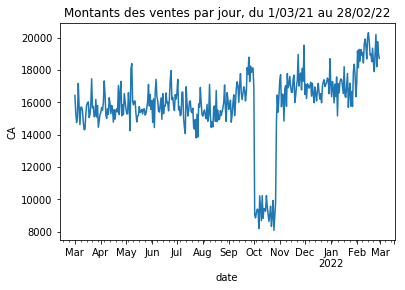

In [30]:
# Visualisation
vj.plot()
plt.ylabel('CA')
plt.title('Montants des ventes par jour, du 1/03/21 au 28/02/22')
plt.legend().set_visible(False)

plt.savefig('fig25.jpeg')

Grosse chute des ventes en octobre 2021. Problèmes d'enregistrement ? 

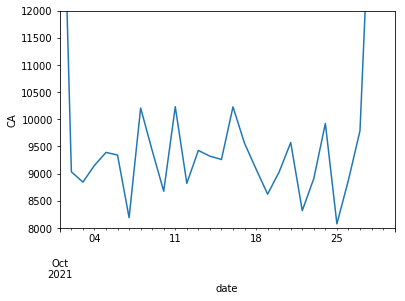

In [31]:
# Zoom sur la partie la plus basse
vj.plot()
plt.ylabel('CA')
plt.xlim('2021-10-01','2021-10-30')
plt.ylim(8000,12000)
plt.legend().set_visible(False)
plt.savefig('fig26.jpeg')

#### Exploration de la période d'octobre 2021 dans le cadre de la chute des ventes sur ce mois

In [32]:
# Je garde les colonnes utiles et mets la date en index
vexplo = cpv[['date','price','categ']].set_index('date')

In [33]:
# Je passe l'index en datetime
vexplo.index = pd.to_datetime(vexplo.index)

In [34]:
# J'échantillone les données par mois
vexplo = vexplo.to_period(freq='M')
vexplo.head()

,price,categ
date,,
2021-04,4.99,0.0
2021-09,3.99,0.0
2021-08,7.99,0.0
2021-08,4.99,0.0
2021-12,6.30,0.0


In [35]:
# Je garde uniquement le mois d'octobre
voct = vexplo[vexplo.index=='2021-10'].reset_index()

In [288]:
voct.head()

,date,price,categ
0,2021-10,12.53,0.0
1,2021-10,3.99,0.0
2,2021-10,4.99,0.0
3,2021-10,12.71,0.0
4,2021-10,8.58,1.0


In [36]:
# Group by par catégorie pour voir les ventes par catégorie
voct = voct.groupby('categ').sum().reset_index()

In [290]:
voct.head()

,categ,price
0,0.0,199292.469504
1,1.0,33762.320000
2,2.0,86179.700000


In [37]:
# Je créé un df sans le mois d'octobre pour rechercher la moyenne des ventes sur l'année
vmoyssoct = vexplo[vexplo.index!='2021-10'].reset_index()

In [292]:
vmoyssoct.head()

,date,price,categ
0,2021-04,4.99,0.0
1,2021-09,3.99,0.0
2,2021-08,7.99,0.0
3,2021-08,4.99,0.0
4,2021-12,6.30,0.0


In [38]:
# Group by pour avoir les ventes par mois et par categorie
vmoyssoct = vmoyssoct.groupby(['date','categ']).sum().reset_index()

In [39]:
# Nouveau group by pour avoir la moyenne des ventes par mois sur l'année
vmoyssoct = vmoyssoct.groupby('categ').mean().reset_index()

In [40]:
vmoyssoct.head()

,categ,price
0,0.0,184684.257174
1,1.0,201238.371818
2,2.0,112117.364545


In [41]:
# Je fais une jointure : 
# 1. des ventes en octobre avec
# 2. le df de la moyenne des ventes sur l'année
voct = voct.merge(vmoyssoct, on='categ')
voct

,categ,price_x,price_y
0,0.0,199292.469504,184684.257174
1,1.0,33762.320000,201238.371818
2,2.0,86179.700000,112117.364545


In [42]:
# Renommage des colonnes
voct.columns = ['categ', 'CA_oct','CA_an_ss_oct']

In [302]:
voct

,categ,CA_oct,CA_an_ss_oct
0,0.0,199292.469504,184684.257174
1,1.0,33762.320000,201238.371818
2,2.0,86179.700000,112117.364545


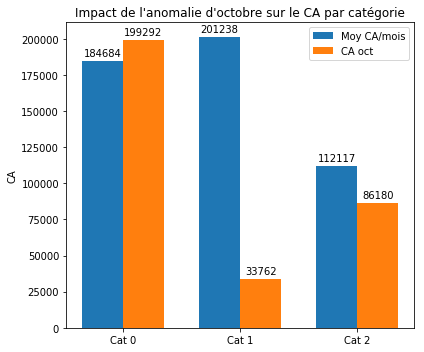

In [43]:
# Histogramme
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
labels = ['Cat 0', 'Cat 1', 'Cat 2']
moy_v_an = voct.CA_an_ss_oct.round().astype(int) # Moyenne des ventes annuelles sans octobre
ventes_oct = voct.CA_oct.round().astype(int) # Ventes d'octobre

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6,5))
rects1 = ax.bar(x - width/2, moy_v_an, width, label='Moy CA/mois')
rects2 = ax.bar(x + width/2, ventes_oct, width, label='CA oct')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CA')
ax.set_title('Impact de l\'anomalie d\'octobre sur le CA par catégorie')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('fig27.jpeg')

On constate que les produits de catégorie 1 sont fortement impactés par cette "anomalie" sur le mois d'octobre. 

#### Exploration de la période d'octobre 2021 dans le cadre de la chute des ventes sur ce mois, pour la catégorie 1

In [44]:
# Je créé un df à partir du df global
vj2 = cpv[['date','price', 'categ']].set_index('date')

In [45]:
# Je mets la fréquence D pour voir les données par jour
vj2 = vj2.to_period(freq='D').reset_index()

In [46]:
# Je rajoute une colonne correspondant au mois
vj2['month'] = vj2['date'].dt.month

In [47]:
# Je garde seulement les données relatives aux jours du mois d'octobre
vj2oct = vj2[vj2['month']==10]

In [48]:
# Suppression de la colonne mois devenue inutile
vj2oct = vj2oct.drop('month', axis=1)

In [49]:
# je pivote la table pour avoir les dates en ligne et les catégorie en colonnes
vj2oct = pd.pivot_table(vj2oct, index='date', columns=['categ'], aggfunc='sum')

In [50]:
# Je renomme les colonnes
vj2oct.columns = ['cat_0', 'cat_1', 'cat_2']

In [156]:
# Vérification
vj2oct.head()

,cat_0,cat_1,cat_2
date,,,
2021-10-01,6947.510000,7003.79,2958.06
2021-10-02,7138.020000,NaN,1895.13
2021-10-03,6783.580000,NaN,2060.49
2021-10-04,6551.904144,NaN,2600.09
2021-10-05,6357.910000,NaN,3032.55


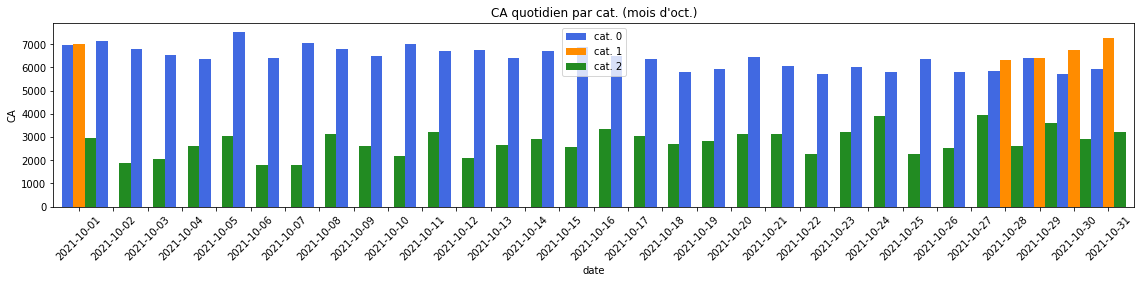

In [52]:
# plotbar pour visualiser
vj2oct.plot.bar(figsize=(16,4),
    width=1,
    color = ['royalblue', 'darkorange', 'forestgreen'])

plt.ylabel('CA')
plt.legend(['cat. 0', 'cat. 1', 'cat. 2'])
plt.tight_layout()
plt.title('CA quotidien par cat. (mois d\'oct.)')
plt.xticks(rotation=45)

plt.savefig('fig28.jpeg')

Problème d'enregistrement pour la cat. 1 ? Rien du 2 au 26 octobre inclus.

##### Visualisation par catégorie

In [53]:
# Je crée un df à partir du précédent mais sans l'index sur les dates
vj3oct = vj2oct.copy()

In [54]:
vj3oct.reset_index(inplace=True)

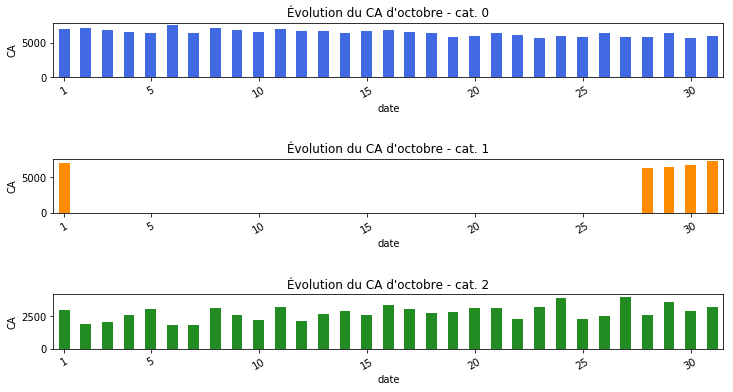

In [55]:
figure = plt.figure(figsize = (12, 6))

plt.gcf().subplots_adjust(hspace = 1.5)

axes = plt.subplot(3,1,1)
axes = vj2oct['cat_0'].plot.bar(color = 'royalblue')
# plt.plot(vj3oct['cat_0'], color = 'royalblue')
axes.set_ylabel('CA')
axes.set_title('Évolution du CA d\'octobre - cat. 0')
marqueurs = [0, 4, 9, 14, 19, 24, 29]
xtick_labels = [1, 5, 10, 15, 20, 25, 30]
plt.xticks(marqueurs, xtick_labels, rotation=30)

axes = plt.subplot(3,1,2)
axes = vj2oct['cat_1'].plot.bar(color = 'darkorange')
axes.set_ylabel('CA')
axes.set_title('Évolution du CA d\'octobre - cat. 1')
marqueurs = [0, 4, 9, 14, 19, 24, 29]
xtick_labels = [1, 5, 10, 15, 20, 25, 30]
plt.xticks(marqueurs, xtick_labels, rotation=30)

axes = plt.subplot(3,1,3)
axes = vj2oct['cat_2'].plot.bar(color = 'forestgreen')
axes.set_ylabel('CA')
axes.set_title('Évolution du CA d\'octobre - cat. 2')
marqueurs = [0, 4, 9, 14, 19, 24, 29]
xtick_labels = [1, 5, 10, 15, 20, 25, 30]
plt.xticks(marqueurs, xtick_labels, rotation=30)

plt.savefig('fig29.jpeg')

# Note technique python : plt.show() et si on n'ajoute pas "axes" -> le graph n'est pas enregistré.  

Où sont les données pour la catégorie 1 ? 

### Répartition des ventes par mois

#### Ventes mensuelles par catégorie

In [156]:
# Rappel du df de base sans les outliers : 
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [56]:
# Je garde les colonnes utiles : 
vm = cpv[['date', 'price', 'categ']]

In [57]:
# Je mets la colonne date en index
vm = vm.set_index('date')

In [58]:
# J'échantillone les données par mois
vm = vm.to_period(freq='M').reset_index()

In [185]:
vm.head()

,cat_0,cat_1,cat_2
date,,,
2021-03,193662.203648,186974.17,98771.48
2021-04,205308.729008,156138.35,111682.70
2021-05,196200.136576,165893.40,127359.59
2021-06,167960.869504,189162.04,124209.56
2021-07,144754.508288,188523.27,147663.47


In [59]:
vm = pd.pivot_table(vm, index='date', columns=['categ'], aggfunc='sum')

In [60]:
vm.columns = ['cat_0', 'cat_1', 'cat_2']

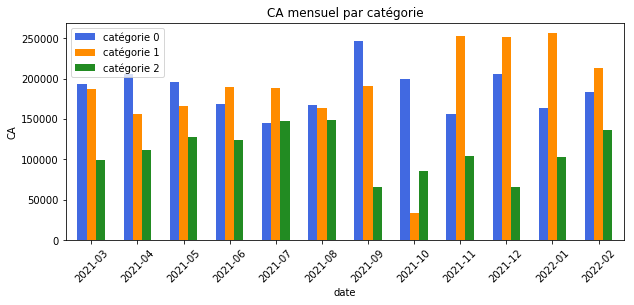

In [61]:
# Multiple bar plot
# cf.https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

vm.plot.bar(
    figsize=(10,4),
    width=0.6,
    color = ['royalblue', 'darkorange', 'forestgreen']
)
plt.ylabel('CA')
plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'])
plt.title('CA mensuel par catégorie')
plt.xticks(rotation=45)

plt.savefig('fig30.jpeg')

On observe des CA mensuels assez disparates en fonction des catégories. 

#### Ventes mensuelles toutes catégories

In [36]:
# Choix des colonnes utiles
vm2 = cpv[['date', 'price', 'categ']]

In [37]:
vm2 = vm2.set_index('date')

In [38]:
vm2.head()

,price,categ
date,,
2021-04-10 18:37:28.723910,4.99,0.0
2021-09-29 11:14:59.793823,3.99,0.0
2021-08-27 19:50:46.796939,7.99,0.0
2021-08-27 20:07:25.878440,4.99,0.0
2021-12-28 11:45:04.072281,6.30,0.0


In [39]:
# Période par mois
vm2 = vm2.to_period(freq='M').reset_index()

In [40]:
vm2.head()

,date,price,categ
0,2021-04,4.99,0.0
1,2021-09,3.99,0.0
2,2021-08,7.99,0.0
3,2021-08,4.99,0.0
4,2021-12,6.30,0.0


In [41]:
vm3 = vm2.groupby('date')['price'].sum()

In [227]:
vm3.head()

date
2021-03    479407.853648
2021-04    473129.779008
2021-05    489453.126576
2021-06    481332.469504
2021-07    480941.248288
Freq: M, Name: price, dtype: float64

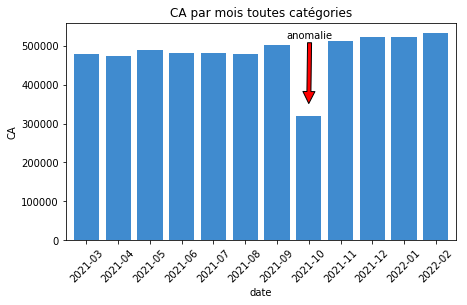

In [74]:
vm3.plot.bar(
    figsize=(7,4),
    width=0.8,
    color = '#408bcf')
plt.ylabel('CA')
plt.xticks(rotation=45)
plt.title('CA par mois toutes catégories')
plt.annotate('anomalie', xy = (7, 350000), xytext = (6.3, 520000),
                arrowprops = {'facecolor': 'red', 'shrink': 0.01})
plt.savefig('fig31.jpeg')

# Mission 3 : Questions

Pour les corrélations, pas besoin d'effectuer en entier les tests (chi-2, ANOVA, etc.). Seul le calcul des statistiques de test est demandé (\(r^2, \eta^2, \xi_n\)).

**Rappel :**  
$H0$ : les deux variables sont indépendantes.  
$H1$ : les deux variables ne sont pas indépendantes.  
**Si p < alpha (0.05)** : on rejette H0 = le hasard seul ne suffit pas à expliquer la différence observée. Le résultat est significatif sur un plan statistique. 

## 1. Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

Il s'agit de 2 variables qualitatives --> test du Chi2 + diagramme en barres.   
$H0$ : pas de corrélation. Dans le cas du Chi2, l'hypothèse de départ c'est que la population étudiée est conforme à son tableau de contingence théorique. 

In [28]:
# Je reprends le tableau de base (sans les clients "grands comptes") 
cpv_ss_gc.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [67]:
# Je fais un tableau de contingence avec crosstab (cf. ici : https://www.youtube.com/watch?v=I_kUj-MfYys)
corrcs = pd.crosstab(cpv_ss_gc.categ, cpv_ss_gc.sex)

In [9]:
corrcs

sex,f,m
categ,,
0.0,101206,94064
1.0,53774,48851
2.0,8122,7634


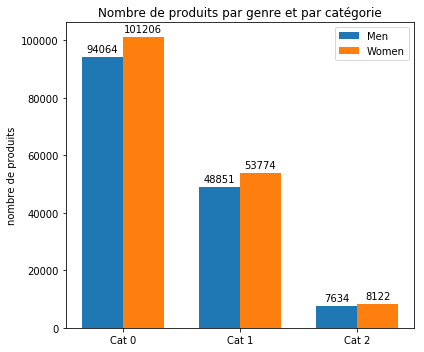

In [68]:
# Histogramme
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
labels = ['Cat 0', 'Cat 1', 'Cat 2']
men_cat = corrcs['m']
women_cat = corrcs['f']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6,5))
rects1 = ax.bar(x - width/2, men_cat, width, label='Men')
rects2 = ax.bar(x + width/2, women_cat, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('nombre de produits')
ax.set_title('Nombre de produits par genre et par catégorie')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('fig32.jpeg')

### Test du chi-2

In [6]:
# cf. https://stackoverflow.com/questions/43963606/python-pandas-chi-squared-test-of-independence
# cf. aussi https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
from scipy.stats import chi2_contingency

In [10]:
chi2, p, dof, expected = chi2_contingency(corrcs) 
print(f'chi2 : {chi2:.2f}\np : {p:.4f}\ndof : {dof}\nexpected :\n {expected}')
# Degrés de liberté correspond à (3 colonnes - 1) x (2 lignes - 1)
# expected = ce à quoi on s'attend en cas d'indépendance des variables

chi2 : 10.11
p : 0.0064
dof : 2
expected :
 [[101542.56654689  93727.43345311]
 [ 53366.13863817  49258.86136183]
 [  8193.29481494   7562.70518506]]


p-value < 0.05 + lecture de la table du chi2 (où on trouve la valeur de 5.99 pour nos données => on rejette H0 : **il existe une corrélation entre le sexe des clients et la catégorie des produits achetés.** 

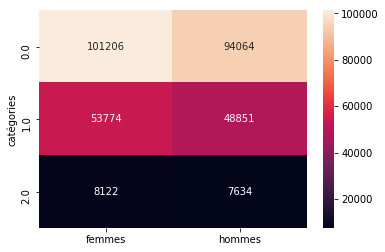

In [69]:
# Heatmap
sns.heatmap(corrcs, 
            annot=True, 
            fmt="d", 
            xticklabels=['femmes', 'hommes'],
            yticklabels=corrcs.index)
plt.xlabel('')
plt.ylabel('catégories')

plt.savefig('fig33.jpeg')

## 2a. Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

Age des client et montant total des achats sont **2 variables quantitatives** --> Test de corrélation de Pearson + nuage de points + lien linéaire calculé. 

In [12]:
# Rappel du tableau de base : 
cpv_ss_ab.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [13]:
# Je créé un nouveau df avec les colonnes utiles
corraa = cpv_ss_ab[['session_id','client_id', 'price', 'age']]

In [14]:
corraa.head()

,session_id,client_id,price,age
0,s_18746,c_4450,4.99,45.0
1,s_97382,c_4450,3.99,45.0
2,s_81509,c_4450,7.99,45.0
3,s_81509,c_4450,4.99,45.0
4,s_141302,c_4450,6.30,45.0


In [15]:
len(corraa)

306343

### 1. 1ère analyse : calcul du montant total des achats en fonction de l'âge : 

Ici, l'analyse est par âge : 19 ans, 20 ans, etc.  

**Rappel:** les 18 ans ne sont pas présents puisqu'on n'est pas sûr de la représentativité de cette classe. 

In [16]:
# Group by pour avoir les montants totaux des achats par âge
corraa = corraa.groupby(['age'])['price'].sum().to_frame().reset_index()

In [17]:
corraa.head()

,age,price
0,19.0,88461.390000
1,20.0,89920.667072
2,21.0,84881.480000
3,22.0,80110.567072
4,23.0,96515.120000


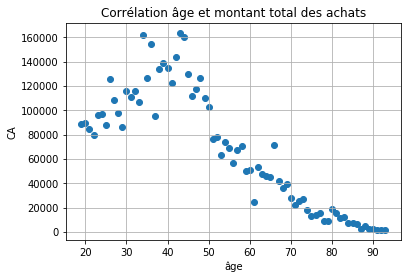

In [18]:
# Représentation graphique
x = corraa['age']
y = corraa['price']
plt.scatter(x,y)
plt.xlabel('âge')
plt.ylabel('CA')
plt.title('Corrélation âge et montant total des achats')
plt.grid()
plt.savefig('fig34.jpeg')

On voit 2 groupes se dessiner : les mois de 50 ans (lim CA > 80000 €) et les plus de 50 ans (lim CA < 80000 €). 

#### Régression linéaire

##### 1ère solution

In [75]:
# single out the input variables X 
X = corraa['age']
# Add a constant 
X = sm.add_constant(X)
# define the target variable y
y = corraa['price']

# Define the model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.96e-22
Time:                        13:38:33   Log-Likelihood:                -867.76
No. Observations:                  75   AIC:                             1740.
Df Residuals:                      73   BIC:                             1744.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.746e+05   8316.366     20.997      0.0

##### Autre solution plus rapide

In [76]:
# Régression linéaire
res = smf.ols("price ~ age", corraa).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.719     
Dependent Variable:   price             AIC:                 1739.5154 
Date:                 2020-05-17 13:38  BIC:                 1744.1504 
No. Observations:     75                Log-Likelihood:      -867.76   
Df Model:             1                 F-statistic:         190.4     
Df Residuals:         73                Prob (F-statistic):  4.96e-22  
R-squared:            0.723             Scale:               6.7442e+08
-----------------------------------------------------------------------
             Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept 174615.1796 8316.3664  20.9966 0.0000 158040.6853 191189.6740
age        -1911.3808  138.5164 -13.7990 0.0000  -2187.4435  -1635.3181
-----------------------------------------------------------------------
Omnibus:                6.314          Durbin-Watson:             0.437
Prob(Omnibus):          0.043          Jarque-Bera (JB):          5.532
Skew:                   0.596          Prob(JB):                  0.063
Kurtosis:               3.589          Condition No.:             167  
=======================================================================

"""

In [77]:
print(f"Coeff : p={res.pvalues[1]}   R2={res.rsquared}") 

Coeff : p=4.956878115918041e-22   R2=0.7228666808755893


p < 0.05 => on rejette H0.  
R2 = 0.7 => 70 % de l'âge d'achat explique le montant total des achats

In [78]:
# Calcul du coefficient de corrélation de Pearson (r)
# from scipy.stats import pearsonr
coeff_pearson = pearsonr(corraa['age'],corraa['price'])
print(f"Le coefficient de Pearson est de : {coeff_pearson[0]}")
print(f"Sa p-value est de : {coeff_pearson[1]}")

Le coefficient de Pearson est de : -0.8502156672724805
Sa p-value est de : 4.956878115917968e-22


On considère, en général, que X et Y sont corrélées lorsque la valeur de leur Pearson est supérieur à 0.5 ou inférieur à -0.5.  
Dans notre cas, les 2 variables sont donc fortement négativement corrélées : **plus l'âge des clients augmentent, moins ils achètent.**

In [175]:
# Autre façon de calculer le cof de Pearson
# corraa.corr()['age']['price']

-0.8502156672724804

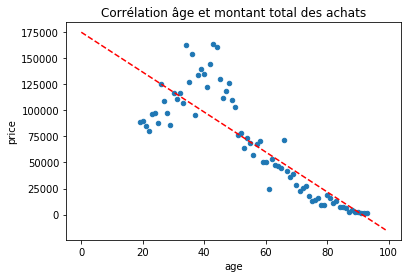

In [79]:
# Droite de régression linéaire
corraa.plot.scatter(x="age", y="price")
xs = np.arange(0,100)
ys = res.params[0] + res.params[1] * xs
plt.plot(xs,ys,'r--')
plt.title('Corrélation âge et montant total des achats')

plt.savefig('fig35.jpeg')

#### Recherche d'éventuels effets non-linéaires

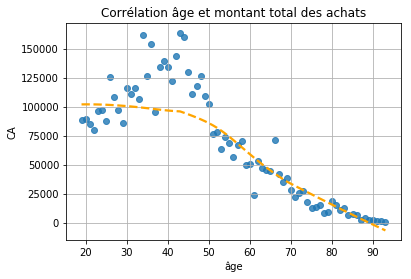

In [19]:
sns.regplot(x="age", y="price", data = corraa, lowess = True, line_kws = {'color':'orange','linestyle':'dashed'})\
.set_title('Corrélation âge et montant total des achats')
plt.xlabel('âge')
plt.ylabel('CA')
plt.grid()
plt.savefig('fig36.jpeg')

La pente semble s'accentuer autour de 45 - 50 ans. 

### 2. 2ème analyse : calcul du montant total des achats en fonction de la classe d'âge des clients

Il s'agit d'une variable quantitative et d'une variable qualitative --> Anova + boite à moustaches.

In [5]:
# Je créé un nouveau df
corraca = cpv_ss_ab[['client_id', 'price', 'age','classe_age']].reset_index()

In [6]:
# Group by pour avoir les montants totaux des achats par client, âge et classe d'âge
corraca = corraca.groupby(['client_id', 'age', 'classe_age']).agg({'price':'sum'}).reset_index()

In [5]:
corraca.head()

,client_id,age,classe_age,price
0,c_1,67.0,50+,300.65
1,c_10,66.0,50+,586.18
2,c_100,30.0,30-50,222.87
3,c_1000,56.0,50+,980.02
4,c_1001,40.0,30-50,1102.45


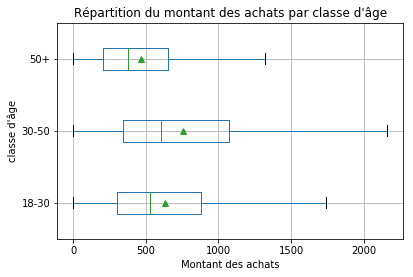

In [6]:
# On peut visualiser la répartition du montant des achats par classe d'âge
corraca.boxplot(column='price', by='classe_age',showmeans=True, showfliers=False, vert = 0)
plt.suptitle('')
plt.title('Répartition du montant des achats par classe d\'âge')
plt.xlabel('Montant des achats')
plt.ylabel('classe d\'âge')
plt.savefig('fig37.jpeg')

### Anova

In [7]:
anova_corraca = smf.ols('price ~ C(classe_age)', data=corraca).fit()
print(anova_corraca.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     362.8
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.11e-151
Time:                        17:14:29   Log-Likelihood:                -61357.
No. Observations:                8177   AIC:                         1.227e+05
Df Residuals:                    8174   BIC:                         1.227e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                631

In [8]:
pvalue_corraca = anova_corraca.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue_corraca))

Ici la p-value est égale à 1.1085307826771044e-151


In [9]:
# Afficher les résultats de la table d'ANOVA
aov_table_corraca = sm.stats.anova_lm(anova_corraca)
print(aov_table_corraca)

                   df        sum_sq       mean_sq           F         PR(>F)
C(classe_age)     2.0  1.399294e+08  6.996472e+07  362.796032  1.108531e-151
Residual       8174.0  1.576345e+09  1.928486e+05         NaN            NaN


#### eta²

In [10]:
# Calcul stat pour eta²
# cf. https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4774896-analysez-une-variable-
# quantitative-et-une-qualitative-par-anova
# Variable quali, y variable quanti
def eta2(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [11]:
eta2(corraca['classe_age'],corraca['price'])

0.08153093511829282

eta² = 0.08 => Taille d'effet moyen d'après le tableau d'interprétation de Cohen. 

#### Montant total des achats par groupe d'âge (à partir de cpv_ss_ab c-à-d sans les grands comptes et la classe 18 ans)

In [7]:
# Si on veut juste la somme (= le montant total des achats par groupe d'âge)
corraca2b = corraca.groupby('classe_age')['price'].sum().reset_index()
corraca2b

,classe_age,price
0,18-30,1.042817e+06
1,30-50,2.581483e+06
2,50+,1.444039e+06


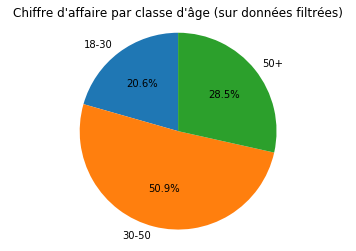

In [9]:
# Répartition du montant des achats par classe d'âge
plt.pie(corraca2b.price, labels=corraca2b.classe_age, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Chiffre d\'affaire par classe d\'âge (sur données filtrées)')
plt.savefig('fig37b.jpeg')

#### Montant total des achats par groupe d'âge (à partir de cpv c-à-d sur les données totales, y compris grands comptes et 18 ans)

In [11]:
# Je créé un nouveau df
corraca2c = cpv[['client_id', 'price', 'age','classe_age']].reset_index()

In [12]:
# Group by pour avoir les montants totaux des achats par client, âge et classe d'âge
corraca2c = corraca2c.groupby(['client_id', 'age', 'classe_age']).agg({'price':'sum'}).reset_index()

In [13]:
# Si on veut juste la somme (= le montant total des achats par groupe d'âge)
corraca2c = corraca2c.groupby('classe_age')['price'].sum().reset_index()
corraca2c

,classe_age,price
0,18-30,1.482462e+06
1,30-50,2.743491e+06
2,50+,1.571722e+06


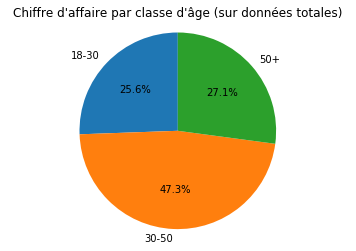

In [14]:
plt.pie(corraca2c.price, labels=corraca2c.classe_age, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Chiffre d\'affaire par classe d\'âge (sur données totales)')

plt.savefig('fig37c.jpeg')

## 2b. Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois par exemple).

 Il faut d'abord calculer le nb d'achats par mois --> regrouper le nb d'occurrences de client_id par mois. 

Il s'agit de 2 variables quantitatives --> Test de corrélation de Pearson + nuage de points + lien linéaire calculé. 

### 1. 1ère analyse : calcul du montant total des achats en fonction de l'âge

##### Calcul de la moyenne du nb d'achats par mois pour la corrélation entre l'âge des clients et la fréquence d’achat 

In [89]:
# Je prends le df global duquel ont été retirés les outliers : 
cafa = cpv_ss_ab[['date','client_id','age', 'classe_age', 'id_prod']]

In [90]:
# Par mois 
cafa = cafa.set_index('date').to_period(freq='M').reset_index()

In [91]:
# Calcul du nb d'achats par mois en fonction de l'âge du client
cafa = cafa.groupby(['date', 'client_id', 'age', 'classe_age']).agg({'id_prod':'count'}).reset_index()

In [92]:
# Je renomme la colonne id_prod qui correspond maintenant au nb d'achats
cafa = cafa.rename(columns={'id_prod': 'nb_achats_mois'})

In [287]:
cafa.sample(4)

,date,client_id,age,classe_age,id_prod
40542,2021-12-26 20:07:24.013941,c_4120,43.0,30-50,0_1099
79047,2022-01-02 08:11:55.767083,c_332,49.0,30-50,0_1472
52514,2021-08-15 19:16:04.655885,c_8581,27.0,18-30,2_226
51284,2021-11-03 18:02:08.535142,c_4617,26.0,18-30,1_130


In [93]:
# Regroupement par âge et moyenne du nb d'achats par mois
cafa2 = cafa.groupby('age').mean().reset_index()

In [288]:
cafa2.sample()

,age,nb_achats_mois
18,37.0,6.605978


In [94]:
# Régression linéaire
res = smf.ols("nb_achats_mois ~ age", cafa2).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.087   
Dependent Variable: nb_achats_mois   AIC:                267.9762
Date:               2020-05-17 13:40 BIC:                272.6112
No. Observations:   75               Log-Likelihood:     -131.99 
Df Model:           1                F-statistic:        8.051   
Df Residuals:       73               Prob (F-statistic): 0.00588 
R-squared:          0.099            Scale:              2.0316  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      5.2626    0.4564  11.5295  0.0000   4.3529   6.1723
age           -0.0216    0.0076  -2.8375  0.0059  -0.0367  -0.0064
-----------------------------------------------------------------
Omnibus:              7.442        Durbin-Watson:           0.218
Prob(Omnibus):        0.024        Jarque-Bera (JB):        4.093
Skew:                 0.369        Prob(JB):                0.129
Kurtosis:             2.125        Condition No.:           167  
=================================================================

"""

In [95]:
print(f"p={res.pvalues[1]}   R2={res.rsquared}")

p=0.005882460170220698   R2=0.09933794139930618


In [31]:
coeff_pearson = pearsonr(cafa2['age'],cafa2['nb_achats_mois'])
print(f"Le coefficient de Pearson est de : {coeff_pearson[0]}")
print(f"Sa p-value est de : {coeff_pearson[1]}")

Le coefficient de Pearson est de : -0.31517922107795426
Sa p-value est de : 0.005882460170220738


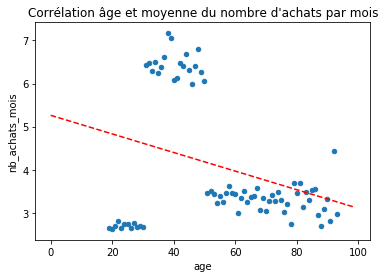

In [96]:
# Droite de régression linéaire
cafa2.plot.scatter(x="age", y="nb_achats_mois")
xs = np.arange(0,100)
ys = res.params[0] + res.params[1] * xs
plt.plot(xs,ys,'r--')
plt.title('Corrélation âge et moyenne du nombre d\'achats par mois')

plt.savefig('fig38.jpeg')

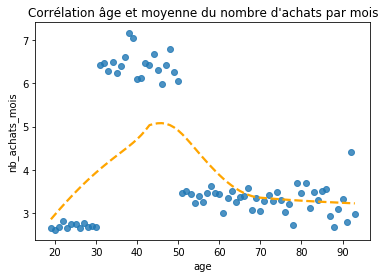

In [97]:
#  Effets non-linéaires
sns.regplot(x="age", y="nb_achats_mois", data=cafa2, lowess=True, line_kws = {'color':'orange','linestyle':'dashed'})\
.set_title('Corrélation âge et moyenne du nombre d\'achats par mois')

plt.savefig('fig39.jpeg')

Un effet non-linéaire évident. Il va être plus intéressant d'analyser par classe d'âge. 

### 2. 2ème analyse : calcul de la corrélation entre la classe d'âge des clients et la fréquence d'achat

In [18]:
# Je prends le df global duquel ont été retirés les outliers : 
cafca = cpv_ss_ab[['date','client_id','classe_age','id_prod']]

In [19]:
# Par mois 
cafca = cafca.set_index('date').to_period(freq='M').reset_index()

In [20]:
# Calcul du nb d'achats par mois en fonction de la classe d'âge des clients
cafca = cafca.groupby(['date', 'client_id', 'classe_age']).agg({'id_prod':'count'}).reset_index()

In [21]:
# Je renomme la colonne id_prod qui correspond maintenant au nb d'achats
cafca = cafca.rename(columns={'id_prod': 'nb_achats_mois'})

In [22]:
cafca.head()

,date,client_id,classe_age,nb_achats_mois
0,2021-03,c_10,50+,1
1,2021-03,c_1000,50+,9
2,2021-03,c_1001,30-50,6
3,2021-03,c_1003,30-50,11
4,2021-03,c_1004,30-50,7


In [102]:
# Regroupement par classe d'âge et moyenne du nb d'achats par mois
cafca.groupby('classe_age').mean().reset_index()

,classe_age,nb_achats_mois
0,18-30,2.697258
1,30-50,6.321166
2,50+,3.505038


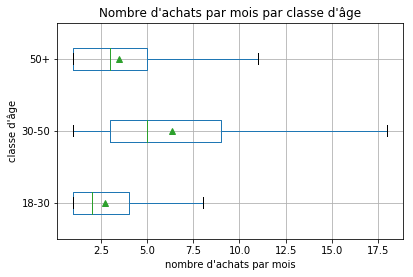

In [104]:
# Répartition du montant des achats par classe d'âge
cafca.boxplot(column='nb_achats_mois', by='classe_age', showmeans=True, showfliers=False, vert = 0)
plt.suptitle('')
plt.title('Nombre d\'achats par mois par classe d\'âge')
plt.xlabel('nombre d\'achats par mois')
plt.ylabel('classe d\'âge')
plt.savefig('fig40.jpeg')

### Anova

In [23]:
anova_cafca = smf.ols('nb_achats_mois ~ C(classe_age)', data=cafca).fit()
print(anova_cafca.summary())

                            OLS Regression Results                            
Dep. Variable:         nb_achats_mois   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5230.
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        17:17:35   Log-Likelihood:            -1.8050e+05
No. Observations:               65273   AIC:                         3.610e+05
Df Residuals:                   65270   BIC:                         3.610e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [24]:
pvalue_cafca = anova_cafca.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue_cafca))

Ici la p-value est égale à 0.0


In [25]:
# Afficher les résultats de la table d'ANOVA
aov_table_cafca = sm.stats.anova_lm(anova_cafca)
print(aov_table_cafca)

                    df         sum_sq       mean_sq            F  PR(>F)
C(classe_age)      2.0  154533.317282  77266.658641  5230.203229     0.0
Residual       65270.0  964244.521457     14.773166          NaN     NaN


In [26]:
eta2(cafca['classe_age'],cafca['nb_achats_mois'])

0.13812690234925448

## 2c. Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles).

Il s'agit de 2 variables quantitatives. 

Il faut d'abord calculer la taille du panier en nombre d'articles puis regrouper par âge. 

In [271]:
# Je reprends le df de base sans les outliers : 
cpv_ss_ab.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [28]:
# Je créé un nouveau df en ne gardant que les colonnes utiles
corrap = cpv_ss_ab[['id_prod','session_id','age', 'classe_age']]

In [314]:
corrap.head()

,id_prod,session_id,age,classe_age
0,0_1483,s_18746,45.0,30-50
1,0_1085,s_97382,45.0,30-50
2,0_1453,s_81509,45.0,30-50
3,0_1405,s_81509,45.0,30-50
4,0_1392,s_141302,45.0,30-50


In [106]:
# Je créé un df pour récupérer la taille du panier en nb d'articles 
corrapa = corrap.groupby(['session_id','age'])['id_prod'].count().reset_index()

In [107]:
# Je renomme la colonne price qui correspond maintenant au nb d'articles par session :
corrapa = corrapa.rename(columns={'id_prod': 'nb_articles'})

In [42]:
corrapa.head()

,session_id,age,nb_articles
0,s_1,55.0,1
1,s_10,52.0,1
2,s_100,44.0,2
3,s_1000,33.0,4
4,s_10000,33.0,3


In [277]:
# Vérification de la taille du panier avec une session comme exemple, la s_1000 en l'occurrence : 
cpv_ss_ab[cpv_ss_ab['session_id']=='s_1000']

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
275579,0_1590,2021-03-03 02:49:03.169115,s_1000,c_1014,18.93,0.0,m,1989.0,33.0,30-50
275592,0_1625,2021-03-03 02:38:09.568389,s_1000,c_1014,5.99,0.0,m,1989.0,33.0,30-50
275601,0_1449,2021-03-03 03:18:58.492283,s_1000,c_1014,4.99,0.0,m,1989.0,33.0,30-50
275606,0_1438,2021-03-03 03:25:12.320225,s_1000,c_1014,9.31,0.0,m,1989.0,33.0,30-50


La session s_1000 comporte bien 4 articles. 

In [108]:
# Je calcule la taille du panier moyen en fonction de l'âge des clients : 
corrapa = corrapa.groupby('age').agg({'nb_articles':'mean'}).reset_index()

In [279]:
corrapa.head()

,age,nb_articles
0,19.0,1.724901
1,20.0,1.742947
2,21.0,1.732310
3,22.0,1.843220
4,23.0,1.791912


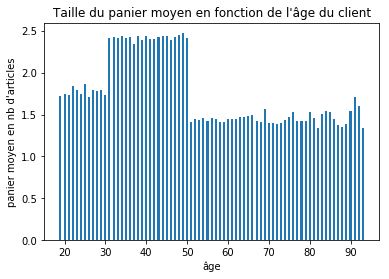

In [112]:
# Graphique : 
x = corrapa['age']
y = np.array(corrapa['nb_articles'])
plt.bar(x,y, width=0.5)
plt.title('Taille du panier moyen en fonction de l\'âge du client')
plt.xlabel('âge')
plt.ylabel('panier moyen en nb d\'articles')

plt.savefig('fig41.jpeg')

On constate des paniers moyens plus importants pour les clients qui ont entre 30 et 50 ans environ.

In [113]:
# Régression linéaire
res_pm = smf.ols("nb_articles ~ age", corrapa).fit()
res_pm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.360   
Dependent Variable: nb_articles      AIC:                50.4624 
Date:               2020-05-17 13:45 BIC:                55.0974 
No. Observations:   75               Log-Likelihood:     -23.231 
Df Model:           1                F-statistic:        42.54   
Df Residuals:       73               Prob (F-statistic): 7.90e-09
R-squared:          0.368            Scale:              0.11177 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.4125    0.1071  22.5338  0.0000   2.1991   2.6258
age           -0.0116    0.0018  -6.5225  0.0000  -0.0152  -0.0081
-----------------------------------------------------------------
Omnibus:               24.078       Durbin-Watson:          0.226
Prob(Omnibus):         0.000        Jarque-Bera (JB):       7.359
Skew:                  0.484        Prob(JB):               0.025
Kurtosis:              1.810        Condition No.:          167  
=================================================================

"""

In [282]:
print(f"Coeff : p={res.pvalues[1]}   R2={res.rsquared}") 

Coeff : p=0.005882460170220698   R2=0.09933794139930618


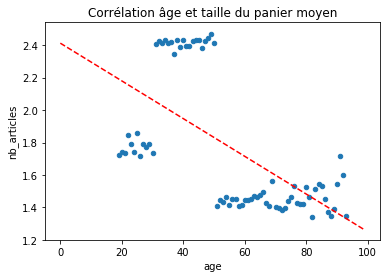

In [114]:
# Droite de régression linéaire
corrapa.plot.scatter(x="age", y="nb_articles")
xs = np.arange(0,100)
ys = res_pm.params[0] + res_pm.params[1] * xs
plt.plot(xs,ys,'r--')
plt.title('Corrélation âge et taille du panier moyen')

plt.savefig('fig42.jpeg')

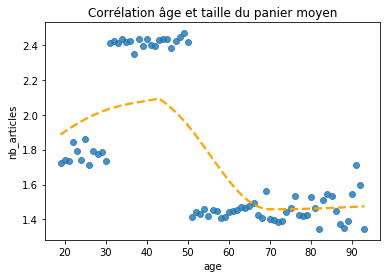

In [116]:
#  Effets non-linéaires
sns.regplot(x="age", y="nb_articles", data=corrapa, lowess=True, line_kws = {'color':'orange','linestyle':'dashed'})\
.set_title('Corrélation âge et taille du panier moyen')

plt.savefig('fig43.jpeg')

In [45]:
# Calcul du coeff de Pearson
coeff_pearson = pearsonr(corrapa['age'],corrapa['nb_articles'])
print(f"Le coefficient de Pearson est de : {coeff_pearson[0]}")
print(f"Sa p-value est de : {coeff_pearson[1]}")

Le coefficient de Pearson est de : -0.6067967902334184
Sa p-value est de : 7.896029840814395e-09


In [284]:
# La distribution n'étant pas linéaire, je teste avec Spearman
# corrapa.corr(method='spearman')['age']['nb_articles']

-0.6574110953058322

##### Taille du panier moyen en fonction de la classe d'âge

In [29]:
# Je créé un df pour récupérer la taille du panier en nb d'articles par classe d'âge
corrapca = corrap.groupby(['session_id','classe_age'])['id_prod'].count().reset_index()

In [30]:
# Je renomme la colonne price qui est devenue le nombre d'articles par panier
corrapca = corrapca.rename(columns={"id_prod": "nb_articles"})

In [48]:
corrapca.head()

,session_id,classe_age,nb_articles
0,s_1,50+,1
1,s_10,50+,1
2,s_100,30-50,2
3,s_1000,30-50,4
4,s_10000,30-50,3


In [119]:
# Je calcule la taille du panier moyen en nb d'articles par classe d'âge
corrapca2 = corrapca.groupby(['classe_age'])['nb_articles'].mean().reset_index()

In [120]:
corrapca2

,classe_age,nb_articles
0,18-30,1.770751
1,30-50,2.403406
2,50+,1.498083


On constate que les 30-50 ont un panier moyen plus important que les autres classes d'âge. 

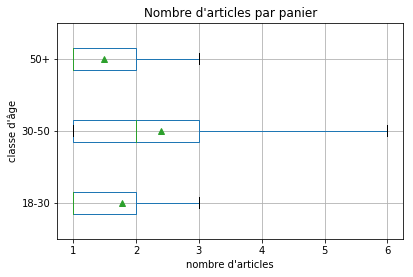

In [121]:
# Répartition par classe d'âge
corrapca.boxplot(column='nb_articles', by='classe_age', showmeans=True, showfliers=False, vert = 0)
plt.xlabel('nombre d\'articles')
plt.ylabel('classe d\'âge')
plt.title('Nombre d\'articles par panier')
plt.suptitle('')

plt.savefig('fig44.jpeg')

### Anova

In [31]:
anova_corrapca = smf.ols('nb_articles ~ C(classe_age)', data=corrapca).fit()
print(anova_corrapca.summary())

                            OLS Regression Results                            
Dep. Variable:            nb_articles   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     9994.
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        17:22:16   Log-Likelihood:            -2.4565e+05
No. Observations:              153626   AIC:                         4.913e+05
Df Residuals:                  153623   BIC:                         4.913e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

In [32]:
pvalue_corrapca = anova_corrapca.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue_corrapca))

Ici la p-value est égale à 0.0


In [33]:
# Afficher les résultats de la table d'ANOVA
aov_table_corrapca = sm.stats.anova_lm(anova_corrapca)
print(aov_table_corrapca)

                     df         sum_sq       mean_sq            F  PR(>F)
C(classe_age)       2.0   28653.604082  14326.802041  9993.511373     0.0
Residual       153623.0  220235.533623      1.433610          NaN     NaN


In [34]:
eta2(corrapca['classe_age'],corrapca['nb_articles'])

0.1151259727360047

## 2d. Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés.

Il s'agit d'une variable quantitative et d'une variable qualitative --> Anova + boite à moustaches.  

In [122]:
# Je créé un nouveau df avec les colonnes utiles
corrac = cpv_ss_ab[['age','categ']]

In [330]:
corrac.head()

,age,categ
0,45.0,0.0
1,45.0,0.0
2,45.0,0.0
3,45.0,0.0
4,45.0,0.0


In [331]:
# Comme nous l'avons vu, il y a des clients qui n'ont pas acheté de produits et des produits qui n'ont pas été vendus. 
# Il y a donc des lignes avec des valeurs nulles :
corrac.loc[corrac.isnull().any(axis=1)].head()

,age,categ
336816,NaN,0.0
336817,NaN,0.0
336818,NaN,0.0
336819,NaN,0.0
336820,NaN,0.0


In [123]:
# Je supprime ces lignes 
corrac = corrac.dropna(how='any')

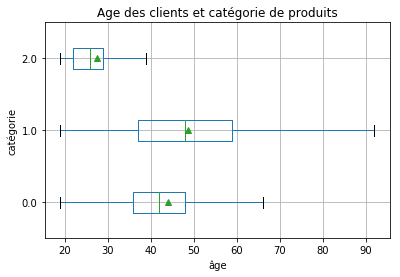

In [125]:
# Boite à moustaches
corrac.boxplot(by='categ',showmeans=True, showfliers = False, vert = 0).set_title('Age des clients et catégorie de produits')
plt.xlabel('âge')
plt.ylabel('catégorie')
plt.suptitle('')
plt.savefig('fig45.jpeg')

Les 3 catégories semblent assez différentes. La question sera de savoir si ces écarts sont significatifs ou pas.

### Anova

In [55]:
# Je créé une copie
corrac2 = corrac.copy()

In [56]:
# Je change le type de catégorie 
categorie = { 0 : 'cat.0', 1 : 'cat.1', 2 : 'cat.2'}
corrac2['categ'] = corrac.categ.apply(lambda d : categorie[d])

In [343]:
corrac2.head()

,age,categ
0,45.0,cat.0
1,45.0,cat.0
2,45.0,cat.0
3,45.0,cat.0
4,45.0,cat.0


In [57]:
anova_corrac2 = smf.ols('age ~ C(categ)', data=corrac2).fit()
print(anova_corrac2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                 1.691e+04
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        23:23:36   Log-Likelihood:            -1.2122e+06
No. Observations:              306303   AIC:                         2.424e+06
Df Residuals:                  306300   BIC:                         2.425e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.0222      0.02

In [59]:
pvalue = anova_corrac2.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 0.0


Ce qui nous intéresse réellement, c'est le **test de Fisher**.  
Prob (F-statistic): test de Fisher ~ 0 => on rejette H0. Les variables sont dépendantes. 

In [346]:
# Afficher les résultats de la table d'ANOVA
aov_table = sm.stats.anova_lm(anova_corrac2)
print(aov_table)

                df        sum_sq       mean_sq             F  PR(>F)
C(categ)       2.0  5.422069e+06  2.711035e+06  16906.727812     0.0
Residual  306300.0  4.911594e+07  1.603524e+02           NaN     NaN


In [347]:
# If the null hypothesis is true (no difference in means between the categories), you expect F to have a value close to 
# 1.0 most of the time. A large F, like the one we observe here, means that the observed variation between the different 
# categories is not happening by chance.
# cf. https://openclassrooms.com/fr/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233031-handle-categorical-predictors

Cela nous indique une différence significative entre les catégories : certaines classes d'âges achètent certaines catégories de produits. 

In [348]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(corrac.age, corrac.categ)
results = mc.tukeyhsd()
print(results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
 0.0    1.0    4.6154   4.4997   4.731    True 
 0.0    2.0   -16.5069 -16.7774 -16.2364  True 
 1.0    2.0   -21.1223 -21.4006 -20.844   True 
-----------------------------------------------


In [349]:
# The table above shows the difference in mean for all the pairs of categories, the confidence intervals, 
# and whether the null hypothesis is rejected or not.

# The reject column is set to true for all the pairs, meaning that the difference in means is significant for all three pairs.

In [333]:
eta2(corrac['categ'],corrac['age'])

0.09941816492348868

##### En fonction de la classe d'âge

In [15]:
# Je créé un df pour récupérer la taille du panier en nb d'articles par classe d'âge
corrcac = cpv_ss_ab[['classe_age','id_prod', 'categ']]

In [16]:
# Je supprime les lignes avec des valeurs nulles : 
corrcac = corrcac.dropna(how='any')

In [17]:
# Je regroupe par classe d'âge et catégorie
corrcac_gb = corrcac.groupby(['classe_age', 'categ']).agg({'id_prod':'count'})

In [501]:
corrcac_gb

id_prod
classe_age categ         
18-30      0.0       6022
           1.0       9665
           2.0      10382
30-50      0.0     145651
           1.0      44143
           2.0       1731
50+        0.0      41929
           1.0      46058
           2.0        722

In [18]:
corrcac_gb.unstack()

id_prod              
categ          0.0    1.0    2.0
classe_age                      
18-30         6022   9665  10382
30-50       145651  44143   1731
50+          41929  46058    722

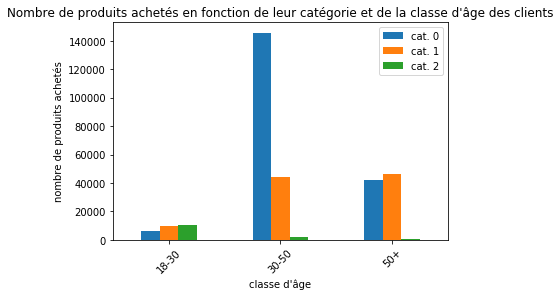

In [131]:
corrcac_gb.unstack().plot(kind='bar')
plt.legend(['cat. 0', 'cat. 1', 'cat. 2'])
plt.title('Nombre de produits achetés en fonction de leur catégorie et de la classe d\'âge des clients')
plt.xticks(rotation=45)
plt.xlabel('classe d\'âge')
plt.ylabel('nombre de produits achetés')      
plt.ylabel = 'nombre de produits achetés'
plt.savefig('fig46.jpeg')

In [19]:
# Je supprime l'index
corrcac_gb2 = corrcac_gb.unstack().reset_index()

In [20]:
corrcac_gb2

classe_age id_prod              
categ                0.0    1.0    2.0
0          18-30    6022   9665  10382
1          30-50  145651  44143   1731
2            50+   41929  46058    722

In [21]:
# Je renomme les colonnes
corrcac_gb2.columns = ['classe_age', 'cat.0', 'cat.1',         
                   'cat.2']

In [22]:
corrcac_gb2

,classe_age,cat.0,cat.1,cat.2
0,18-30,6022,9665,10382
1,30-50,145651,44143,1731
2,50+,41929,46058,722


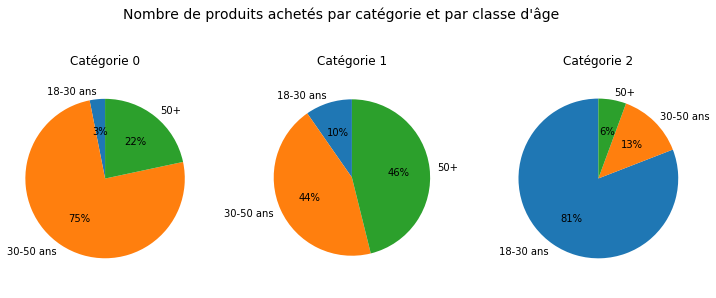

In [23]:
# Visualisation avec des pieplot
fig = plt.figure(figsize=(12, 4))
fig.suptitle("Nombre de produits achetés par catégorie et par classe d'âge", fontsize=14, y= 1.1)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.pie(corrcac_gb2['cat.0'], 
       labels=["18-30 ans", "30-50 ans", "50+"],
       autopct='%1.0f%%',
       startangle=90
      )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Catégorie 0')

ax2.pie(corrcac_gb2['cat.1'], 
       labels=["18-30 ans", "30-50 ans", "50+"],
       autopct='%1.0f%%', 
       startangle=90
      )
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Catégorie 1')

ax3.pie(corrcac_gb2['cat.2'], 
       labels=["18-30 ans", "30-50 ans", "50+"],
       autopct='%1.0f%%', 
       startangle=90
      )
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('Catégorie 2')

plt.subplots_adjust(wspace=0.4,hspace=0)


plt.savefig('fig46b.jpeg')

In [75]:
# Je mets classe d'âge en index
corrcac_gb2.set_index('classe_age', inplace = True)

In [349]:
corrcac_gb2

,cat.0,cat.1,cat.2
classe_age,,,
18-30,6022,9665,10382
30-50,145651,44143,1731
50+,41929,46058,722


In [73]:
import scipy.stats as st

In [76]:
# Calcul du chi2 : 
chi2, p, dof, expected = st.chi2_contingency(corrcac_gb2.values)

In [77]:
dof

4

In [360]:
print(f'Le khi-2 est de {chi2:.2f} et la p-val est de {p}')

Le khi-2 est de 117223.75 et la p-val est de 0.0


Il existe un lien entre les variables (au vu de la table du chi2). 

In [353]:
# Je fais un tableau de contingence avec crosstab
cont_corrcac = pd.crosstab(cpv_ss_ab.categ, cpv_ss_ab.classe_age)

In [354]:
# Pb : le tableau de contingence avec crosstab est incorrect, je n'ai pas trouvé pourquoi
# cont_corrcac

classe_age,18-30,30-50,50+
categ,,,
0.0,41929,6022,145651
1.0,46058,9665,44143
2.0,722,10382,1731


In [356]:
# Pourtant les valeurs calculée sont identiques à celles calculées selon l'autre méthode
# chi2, p, dof, expected = st.chi2_contingency(cont_corrcac.values)
# print(f'Le khi-2 est de {chi2:.2f} et la p-val est de {p}')

Le khi-2 est de 117223.75 et la p-val est de 0.0


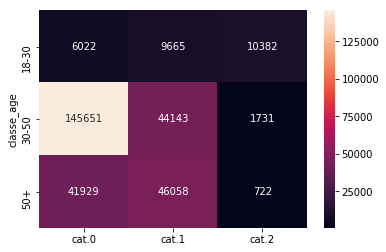

In [141]:
# Heatmap
sns.heatmap(corrcac_gb2, annot=True, fmt="d")
plt.savefig('fig47.jpeg')